Tasks
-------

1. Plot temperature and salinity profiles of the collocated eddy
2. Edit eddy2argo_beta.py to collocate argo and cyclonic eddies
3. Plot profiles and compare to the anti-cyclonic eddy profiles


In [5]:
%run eddy2argo_beta.py

In [13]:
print(ids)

(array([0]), array([59]))


In [8]:
timeargo

masked_array(data = [ 24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.  24134.
  24134.  24134.  24134.  24134.  24134.  24134.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.  24133.
  24133.  24133.  24133.  24133

In [15]:
tempargo[59]

masked_array(data = [5.679999828338623 5.681000232696533 5.682000160217285 ..., -- -- --],
             mask = [False False False ...,  True  True  True],
       fill_value = 99999.0)

In [16]:
import matplotlib.pyplot as plt

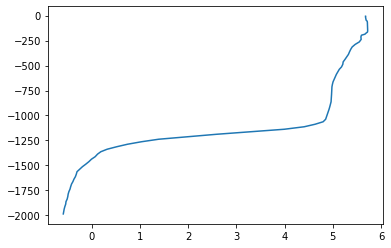

In [18]:
plt.plot(tempargo[59], -depthargo[59])

In [20]:
radeddy[59]

49777.060917025534

In [24]:
loneddy.min(), loneddy.max(), lateddy.min(), lateddy.max()

(-24.291666666666668,
 19.991666666666667,
 58.694444444444443,
 79.408536585365852)

In [21]:
%matplotlib inline
import cartopy.feature as cfeature
from cartopy import config
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [40]:
# Earth radius
R = 6373000 #m

In [41]:
# Approximate eddy radius in degrees
rad = np.arcsin(radeddy[59]/R)*180/np.pi

In [46]:
loneddy[59], lateddy[59]

(1.4525862068965518, 69.612068965517238)

Text(0.5, 1.05, 'Detected eddies')

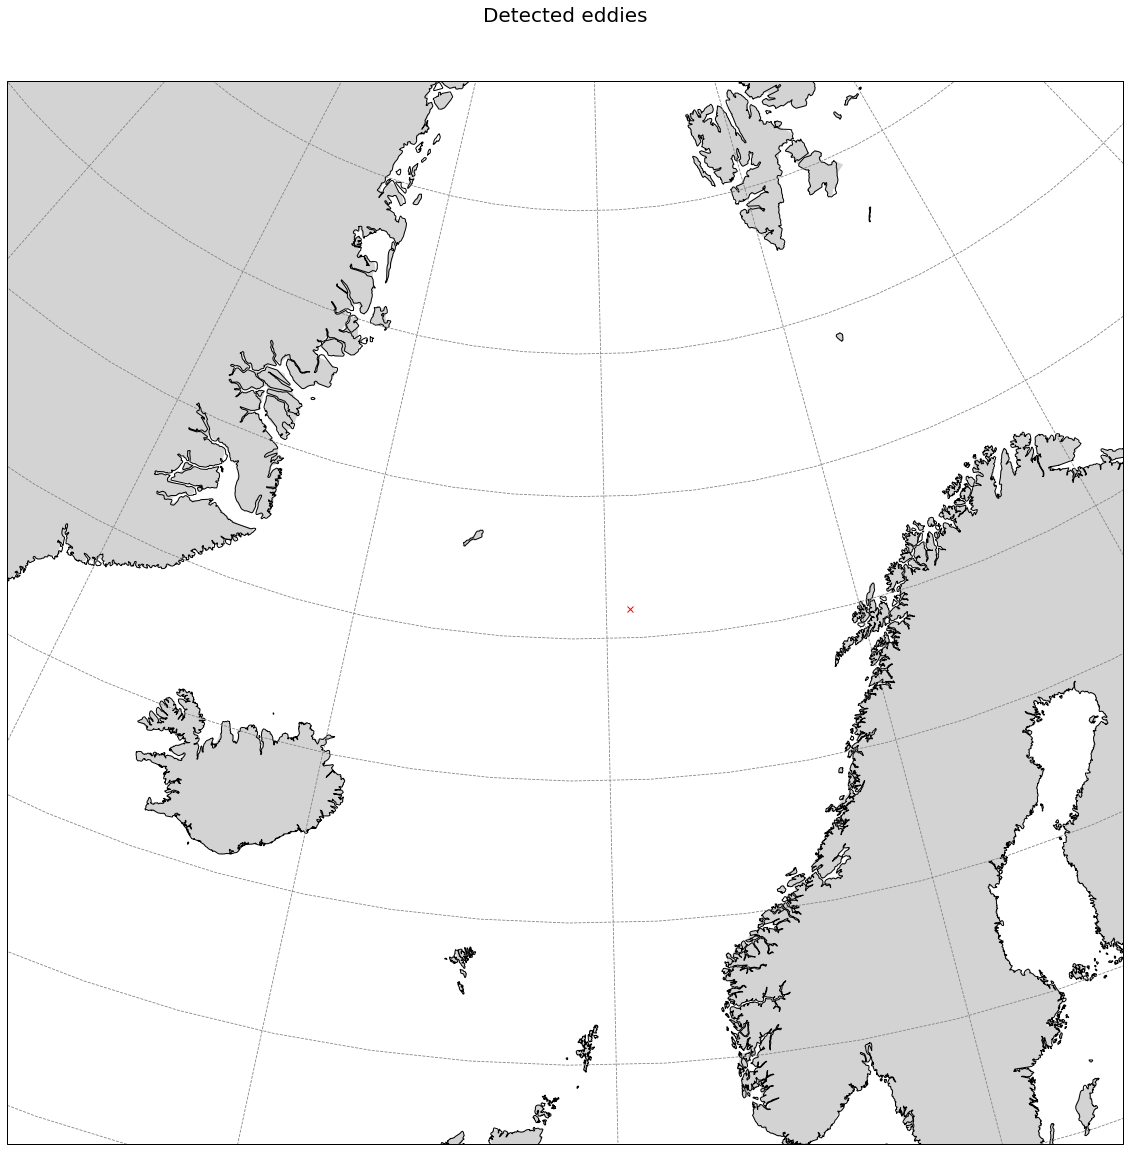

In [47]:
globe = ccrs.Globe(ellipse='WGS84', semimajor_axis=6378137, flattening=1/298.2572235604902)
proj = ccrs.Stereographic(central_longitude=np.mean(loneddy), central_latitude=np.mean(lateddy), globe=globe)
#proj = ccrs.Stereographic(central_longitude=15, central_latitude=80, globe=globe)

#def compute_radius(stere, radius_degrees):
#    phi1 = lat + radius_degrees if lat <= 0 else lat - radius_degrees
#    _, y1 = stere.transform_point(lon, phi1, ccrs.PlateCarree())
#    return abs(y1)

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': proj}, figsize=(20, 20))
extent = [loneddy.min()-.5, loneddy.max()+.5, lateddy.min()-.5, lateddy.max()+.5]
land_f = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray')

axs.set_extent(extent, crs=ccrs.PlateCarree())
axs.gridlines(color='gray', linestyle='--')
axs.add_feature(land_f)
axs.coastlines(resolution='10m')
#plt.Circle((loneddy[59], lateddy[59]), rad, fill=False)
axs.plot(loneddy[59], lateddy[59], 'rx', transform=ccrs.PlateCarree())
#axs.contourf(lon, lat, u, 200, vmin=-10, vmax=10, transform=ccrs.PlateCarree(), cmap='bwr')
axs.set_title('Detected eddies', y=1.05, fontsize=20)
